In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import io
import dataframe_image as dfi

In [4]:
from pathlib import Path

In [8]:
# Define paths
DATA_PATH = Path("../data/raw")

In [9]:
# Load data
df = pd.read_excel(DATA_PATH / "2020_Birth_Final.xlsx")


In [11]:
# Quick exploration
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 301712 entries, 0 to 301711
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Registered_Year        301712 non-null  int64  
 1   Registered_Month2.0    301712 non-null  int64  
 2   Registered_Month       301712 non-null  str    
 3   Registered_District    301712 non-null  str    
 4   Birh_Year              301712 non-null  int64  
 5   Birth_Month.0          301712 non-null  int64  
 6   Birth_Month            301712 non-null  str    
 7   Gender                 301710 non-null  str    
 8   Hospital or Not        301712 non-null  str    
 9   Multiple_Birth_Status  297549 non-null  str    
 10  Birth_Weight(grams)    268170 non-null  float64
 11  Birth_Order            275705 non-null  float64
 12  Birth_Order - Copy     275705 non-null  float64
 13  Age of Mother          301712 non-null  int64  
 14  Marital_Status         301695 non-null  str    

,Registered_Year,Registered_Month2.0,Birh_Year,Birth_Month.0,Birth_Weight(grams),Birth_Order,Birth_Order - Copy,Age of Mother
count,301712.0,301712.000000,301712.000000,301712.000000,268170.000000,275705.000000,275705.000000,301712.000000
mean,2020.0,6.764511,2019.647952,6.575695,2917.685233,1.843158,1.843158,29.624549
std,0.0,3.395403,2.081294,3.381907,479.894186,0.897356,0.897356,22.616213
min,2020.0,1.000000,1945.000000,1.000000,620.000000,0.000000,0.000000,12.000000
25%,2020.0,4.000000,2020.000000,4.000000,2640.000000,1.000000,1.000000,25.000000
50%,2020.0,7.000000,2020.000000,7.000000,2930.000000,2.000000,2.000000,29.000000
75%,2020.0,10.000000,2020.000000,9.000000,3220.000000,2.000000,2.000000,33.000000
max,2020.0,12.000000,2020.000000,12.000000,7740.000000,9.000000,9.000000,999.000000


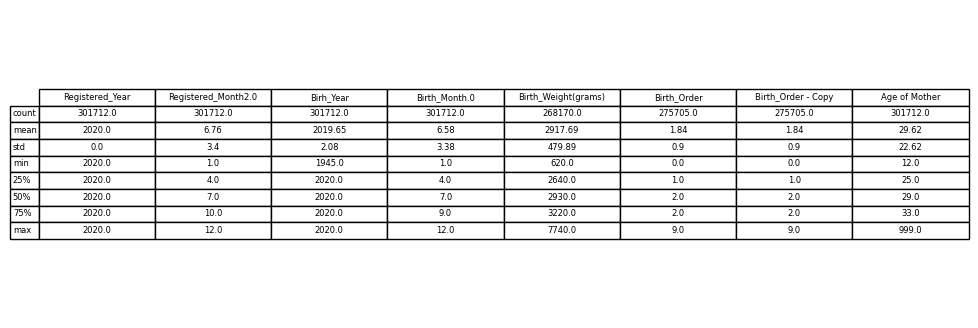

In [11]:
# For df.describe()
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
table_data = df.describe().round(2)
tbl = table(ax, table_data, loc='center', cellLoc='center')
plt.savefig('describe_output.png', dpi=300, bbox_inches='tight')
plt.show()


📊 Creating missing values table...


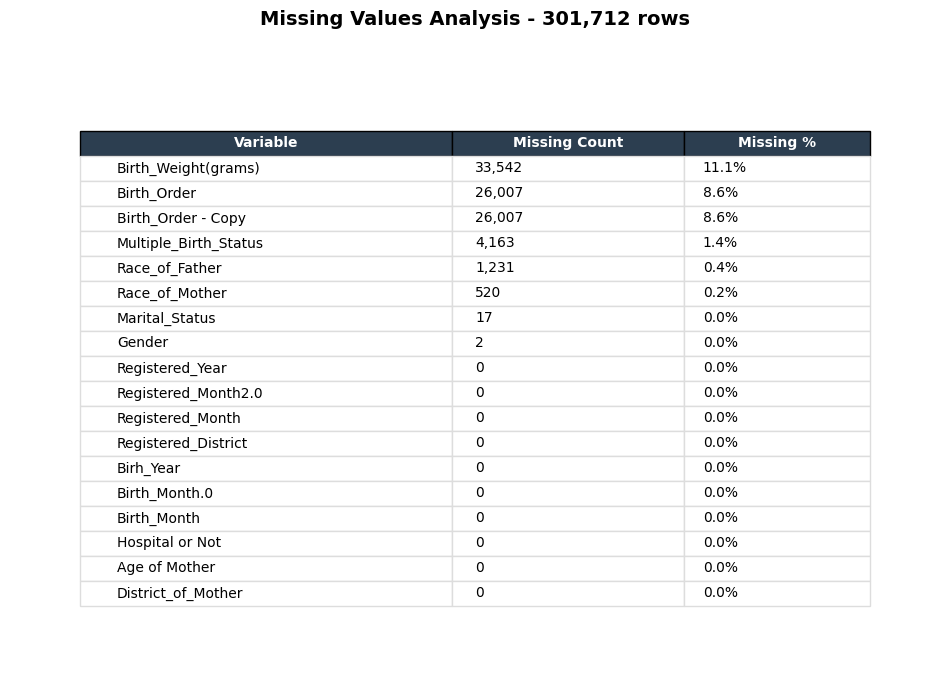

✅ Saved: missing_values.png


In [13]:

# Create missing values table
print("📊 Creating missing values table...")

# Prepare data
missing_data = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_data.append([col, f"{missing_count:,}", f"{missing_percent:.1f}%"])

# Sort by missing count (descending)
missing_data.sort(key=lambda x: int(x[1].replace(',', '')), reverse=True)

# Add header
table_data = [['Variable', 'Missing Count', 'Missing %']] + missing_data

# Create figure
fig, ax = plt.subplots(figsize=(12, len(missing_data) * 0.4 + 1))
ax.axis('off')
ax.axis('tight')

# Create table
tbl = ax.table(cellText=table_data[1:],
               colLabels=table_data[0],
               cellLoc='left',
               loc='center',
               colWidths=[0.4, 0.25, 0.2])

# Style
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

# Header style
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_edgecolor('#dddddd')

plt.title(f'Missing Values Analysis - {len(df):,} rows', 
          fontsize=14, fontweight='bold', pad=20)
plt.savefig('missing_values.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Saved: missing_values.png")

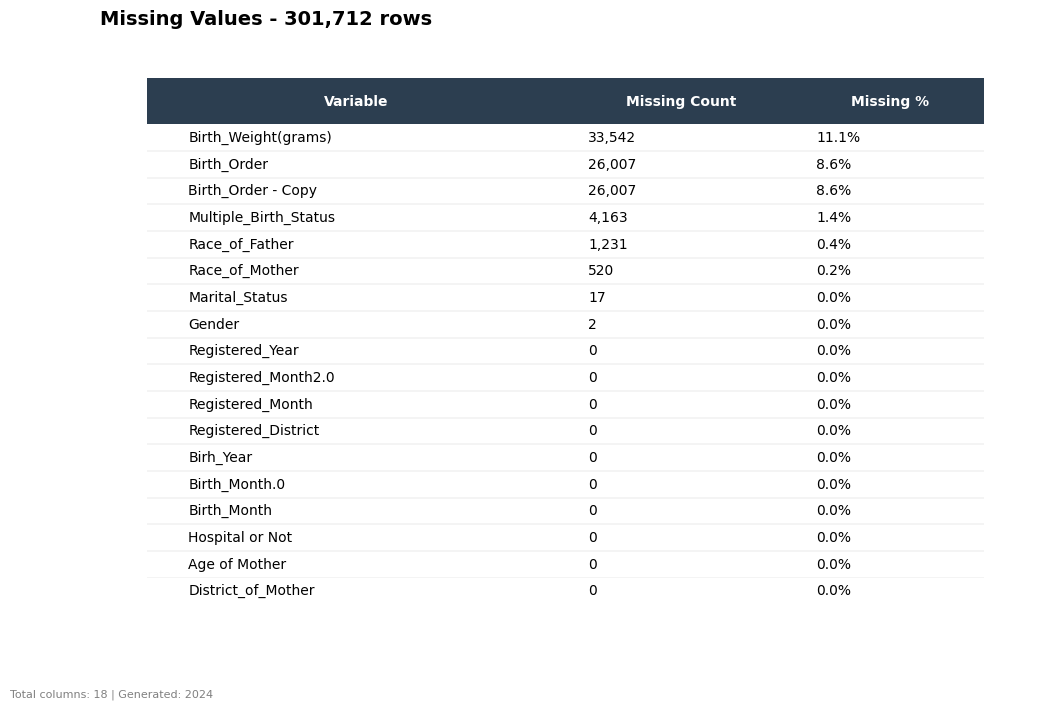

✅ Saved: missing_values_clean.png


In [14]:


# Prepare data
missing_data = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_data.append([col, f"{missing_count:,}", f"{missing_percent:.1f}%"])

# Sort by missing count
missing_data.sort(key=lambda x: int(x[1].replace(',', '')), reverse=True)

# Create figure
fig, ax = plt.subplots(figsize=(12, len(missing_data) * 0.35 + 1.2))
ax.axis('off')

# Create table
tbl = ax.table(cellText=missing_data,
               colLabels=['Variable', 'Missing Count', 'Missing %'],
               cellLoc='left',
               loc='center',
               colWidths=[0.45, 0.25, 0.2])

# Style - CLEAN horizontal lines only
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.6)

for (row, col), cell in tbl.get_celld().items():
    cell.set_linewidth(0)  # Remove all borders
    cell.set_edgecolor('white')
    
    if row == 0:  # Header
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(weight='bold', color='white')
        cell.set_height(0.08)
    else:  # Data rows
        cell.set_facecolor('white')
        cell.set_text_props(color='black')
        
        # Add subtle horizontal line below each row
        if row < len(missing_data):  # All rows except last
            cell.set_edgecolor('#cccccc')
            cell.set_linewidth(0.3)
            cell.visible_edges = 'B'  # Bottom edge only

plt.title(f'Missing Values - {len(df):,} rows', 
          fontsize=14, fontweight='bold', pad=20, loc='left')

# Add small footer
plt.figtext(0.05, 0.02, f'Total columns: {len(df.columns)} | Generated: 2024', 
            fontsize=8, color='gray')

plt.savefig('missing_values_clean.png', 
            dpi=300, 
            bbox_inches='tight', 
            facecolor='white',
            pad_inches=0.3)
plt.show()

print("✅ Saved: missing_values_clean.png")

In [15]:


# Create missing values table
missing_data = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_data.append({
        'Variable': col,
        'Missing Count': missing_count,
        'Missing %': round(missing_percent, 1),
        'Data Type': str(df[col].dtype),
        'Unique Values': df[col].nunique()
    })

missing_df = pd.DataFrame(missing_data)
missing_df = missing_df.sort_values('Missing Count', ascending=False)

# Save to Excel with formatting
with pd.ExcelWriter('01_missing_values.xlsx', engine='openpyxl') as writer:
    missing_df.to_excel(writer, sheet_name='Missing Values', index=False)
    
    # Auto-fit columns
    worksheet = writer.sheets['Missing Values']
    for column in worksheet.columns:
        max_length = 0
        column_letter = column[0].column_letter
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except:
                pass
        adjusted_width = min(max_length + 2, 50)
        worksheet.column_dimensions[column_letter].width = adjusted_width

print("✅ Saved: 01_missing_values.xlsx")

✅ Saved: 01_missing_values.xlsx


In [16]:


def analyze_variable(df, column_name):
    """
    Complete analysis of a single variable
    Detects if qualitative or quantitative automatically
    """
    
    print(f"\n{'='*60}")
    print(f"📊 ANALYZING VARIABLE: '{column_name}'")
    print(f"{'='*60}")
    
    # Get data
    data = df[column_name]
    
    # Basic Info
    print(f"\n📌 BASIC INFORMATION:")
    print(f"   • Data Type: {data.dtype}")
    print(f"   • Total Values: {len(data):,}")
    print(f"   • Missing Values: {data.isnull().sum():,} ({(data.isnull().sum()/len(data)*100):.1f}%)")
    print(f"   • Unique Values: {data.nunique():,}")
    
    # Determine variable type
    if data.dtype in ['object', 'category', 'bool']:
        var_type = "QUALITATIVE (Categorical)"
    elif data.dtype in ['int64', 'float64']:
        if data.nunique() < 20:  # Few unique values = categorical numeric
            var_type = "QUALITATIVE (Numeric Categorical)"
        else:
            var_type = "QUANTITATIVE (Continuous)"
    elif 'datetime' in str(data.dtype):
        var_type = "DATE/TIME"
    else:
        var_type = f"OTHER ({data.dtype})"
    
    print(f"   • Variable Type: {var_type}")
    
    # Create analysis based on type
    if 'QUALITATIVE' in var_type or var_type == "DATE/TIME":
        analyze_qualitative(data, column_name)
    elif 'QUANTITATIVE' in var_type:
        analyze_quantitative(data, column_name)
    
    return var_type

def analyze_qualitative(data, column_name):
    """Analyze qualitative/categorical variables"""
    
    print(f"\n📊 QUALITATIVE ANALYSIS:")
    
    # Drop missing for analysis
    data_clean = data.dropna()
    
    # Frequency table
    freq = data_clean.value_counts()
    freq_pct = (data_clean.value_counts(normalize=True) * 100).round(1)
    
    # Create summary dataframe
    summary_df = pd.DataFrame({
        'Category': freq.index,
        'Count': freq.values,
        'Percentage': freq_pct.values
    })
    
    print(f"\n📋 TOP 10 CATEGORIES:")
    print(summary_df.head(10).to_string(index=False))
    
    # Check for many categories
    if len(freq) > 20:
        print(f"\n⚠️  Warning: {len(freq)} unique categories - too many to visualize all")
        print(f"   Showing top 20, others grouped as 'Other'")
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot (top 15)
    top_n = min(15, len(freq))
    top_cats = freq.head(top_n)
    
    axes[0].barh(range(top_n), top_cats.values)
    axes[0].set_yticks(range(top_n))
    axes[0].set_yticklabels([str(x)[:20] + '...' if len(str(x)) > 20 else str(x) 
                             for x in top_cats.index])
    axes[0].set_xlabel('Count')
    axes[0].set_title(f'Top {top_n} Categories - {column_name}')
    axes[0].invert_yaxis()
    
    # Pie chart (top 5 + others)
    if len(freq) > 5:
        top5 = freq.head(5)
        others = pd.Series([freq[5:].sum()], index=['Others'])
        pie_data = pd.concat([top5, others])
    else:
        pie_data = freq
    
    axes[1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', 
                startangle=90, textprops={'fontsize': 9})
    axes[1].set_title('Distribution')
    
    plt.suptitle(f'Qualitative Analysis: {column_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'analysis_{column_name}_qualitative.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save detailed table
    summary_df.to_csv(f'{column_name}_categories.csv', index=False)
    print(f"\n💾 Saved: {column_name}_categories.csv")

def analyze_quantitative(data, column_name):
    """Analyze quantitative/numeric variables"""
    
    print(f"\n📊 QUANTITATIVE ANALYSIS:")
    
    # Drop missing for analysis
    data_clean = data.dropna()
    
    # Statistics
    stats = data_clean.describe(percentiles=[.1, .25, .5, .75, .9]).round(2)
    
    print(f"\n📋 STATISTICS:")
    print(f"   • Mean: {stats['mean']:.2f}")
    print(f"   • Median: {stats['50%']:.2f}")
    print(f"   • Std Dev: {stats['std']:.2f}")
    print(f"   • Min: {stats['min']:.2f}")
    print(f"   • Max: {stats['max']:.2f}")
    print(f"   • Range: {stats['max'] - stats['min']:.2f}")
    print(f"   • Q1 (25%): {stats['25%']:.2f}")
    print(f"   • Q3 (75%): {stats['75%']:.2f}")
    print(f"   • IQR: {stats['75%'] - stats['25%']:.2f}")
    
    # Check for outliers
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
    
    print(f"\n📌 OUTLIERS:")
    print(f"   • Lower bound: {lower_bound:.2f}")
    print(f"   • Upper bound: {upper_bound:.2f}")
    print(f"   • Outliers count: {len(outliers)} ({len(outliers)/len(data_clean)*100:.1f}%)")
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Histogram
    axes[0, 0].hist(data_clean, bins=30, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(stats['mean'], color='red', linestyle='--', label=f"Mean: {stats['mean']:.2f}")
    axes[0, 0].axvline(stats['50%'], color='green', linestyle='--', label=f"Median: {stats['50%']:.2f}")
    axes[0, 0].set_xlabel(column_name)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution (Histogram)')
    axes[0, 0].legend()
    
    # Box plot
    axes[0, 1].boxplot(data_clean, vert=False)
    axes[0, 1].set_xlabel(column_name)
    axes[0, 1].set_title('Box Plot (shows outliers)')
    
    # Density plot
    axes[1, 0].hist(data_clean, bins=30, density=True, alpha=0.7, edgecolor='black')
    data_clean.plot.kde(ax=axes[1, 0], color='red', linewidth=2)
    axes[1, 0].set_xlabel(column_name)
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].set_title('Distribution with Density Curve')
    
    # Cumulative distribution
    axes[1, 1].hist(data_clean, bins=30, cumulative=True, density=True, 
                    alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel(column_name)
    axes[1, 1].set_ylabel('Cumulative Probability')
    axes[1, 1].set_title('Cumulative Distribution')
    axes[1, 1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Median')
    axes[1, 1].axhline(y=0.25, color='orange', linestyle='--', alpha=0.5, label='Q1')
    axes[1, 1].axhline(y=0.75, color='orange', linestyle='--', alpha=0.5, label='Q3')
    axes[1, 1].legend()
    
    plt.suptitle(f'Quantitative Analysis: {column_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'analysis_{column_name}_quantitative.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save statistics
    stats_df = pd.DataFrame({
        'Statistic': ['count', 'mean', 'std', 'min', '10%', '25%', '50%', '75%', '90%', 'max', 'IQR'],
        'Value': [
            stats['count'], stats['mean'], stats['std'], stats['min'],
            stats['10%'], stats['25%'], stats['50%'], stats['75%'], stats['90%'],
            stats['max'], stats['75%'] - stats['25%']
        ]
    })
    stats_df.to_csv(f'{column_name}_statistics.csv', index=False)
    print(f"\n💾 Saved: {column_name}_statistics.csv")

# === ANALYZE SPECIFIC VARIABLES ===

# Example 1: Analyze one variable by name
variable_name = 'birth_weight'  # Change this to your column name
if variable_name in df.columns:
    var_type = analyze_variable(df, variable_name)
else:
    print(f"❌ Column '{variable_name}' not found!")
    print(f"Available columns: {list(df.columns)[:10]}...")

# Example 2: Analyze multiple important variables
important_vars = ['mother_age', 'birth_weight', 'gestation_weeks', 'hospital_type']  # Adjust as needed

for var in important_vars:
    if var in df.columns:
        analyze_variable(df, var)
    else:
        print(f"\n⚠️  Column '{var}' not found")

# Example 3: Auto-detect and analyze all variables (but be selective)
print("\n" + "="*60)
print("📋 DATASET VARIABLES SUMMARY")
print("="*60)

for col in df.columns[:10]:  # First 10 columns
    dtype = df[col].dtype
    missing = df[col].isnull().sum()
    unique = df[col].nunique()
    
    if dtype in ['object', 'category']:
        type_label = "📝 QUALITATIVE"
    elif dtype in ['int64', 'float64']:
        if unique < 20:
            type_label = "🔢 QUALITATIVE (numeric code)"
        else:
            type_label = "📈 QUANTITATIVE"
    else:
        type_label = f"❓ {dtype}"
    
    print(f"{type_label:30} | {col:25} | Missing: {missing:6,} | Unique: {unique:6,}")

❌ Column 'birth_weight' not found!
Available columns: ['Registered_Year', 'Registered_Month2.0', 'Registered_Month', 'Registered_District', 'Birh_Year', 'Birth_Month.0', 'Birth_Month', 'Gender', 'Hospital or Not', 'Multiple_Birth_Status']...

⚠️  Column 'mother_age' not found

⚠️  Column 'birth_weight' not found

⚠️  Column 'gestation_weeks' not found

⚠️  Column 'hospital_type' not found

📋 DATASET VARIABLES SUMMARY
🔢 QUALITATIVE (numeric code)   | Registered_Year           | Missing:      0 | Unique:      1
🔢 QUALITATIVE (numeric code)   | Registered_Month2.0       | Missing:      0 | Unique:     12
❓ str                          | Registered_Month          | Missing:      0 | Unique:     12
❓ str                          | Registered_District       | Missing:      0 | Unique:     25
📈 QUANTITATIVE                 | Birh_Year                 | Missing:      0 | Unique:     63
🔢 QUALITATIVE (numeric code)   | Birth_Month.0             | Missing:      0 | Unique:     12
❓ str          

In [ ]:
# Using pandas built-in boxplot
df['mother_age'].dropna().plot.box(figsize=(8, 6))
plt.title('Boxplot of Mother\'s Age')
plt.ylabel('Age (years)')
plt.grid(True, alpha=0.3)
plt.savefig('boxplot_mother_age_pandas.png', dpi=300, bbox_inches='tight')
plt.show()


🔍 Analyzing column: Birth_Weight(grams)

📌 Basic Information:
   • Data Type: float64
   • Total: 301,712
   • Present: 268,170
   • Missing: 33,542 (11.1%)

📈 Statistics:
   • Mean: 2917.69
   • Median: 2930.00
   • Min: 620.00
   • Max: 7740.00


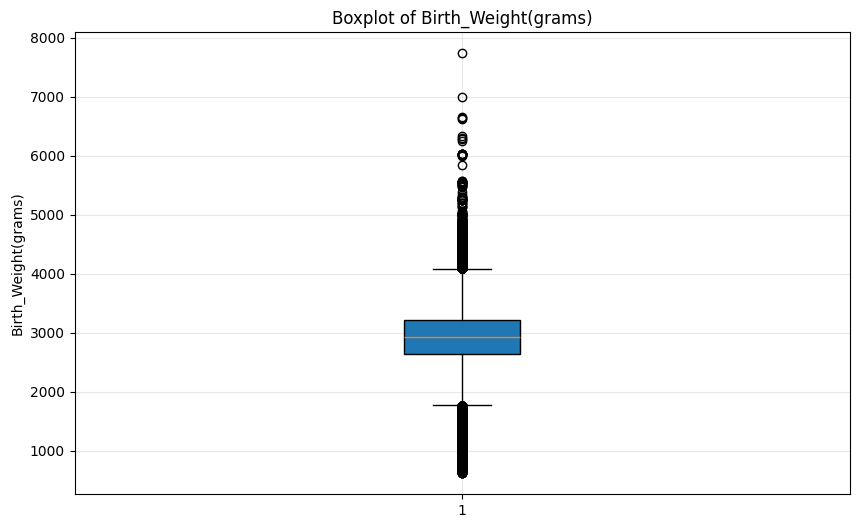

✅ Saved: boxplot_Birth_Weight(grams).png


In [18]:
COLUMN_NAME = 'Birth_Weight(grams)'  # Change this one line to analyze different columns

print(f"\n🔍 Analyzing column: {COLUMN_NAME}")
print("="*50)

# Now use COLUMN_NAME everywhere
data = df[COLUMN_NAME]

# Basic info
print(f"\n📌 Basic Information:")
print(f"   • Data Type: {data.dtype}")
print(f"   • Total: {len(data):,}")
print(f"   • Present: {data.count():,}")
print(f"   • Missing: {data.isnull().sum():,} ({(data.isnull().sum()/len(data)*100):.1f}%)")

# Analysis based on type
if data.dtype in ['int64', 'float64']:
    valid_data = data.dropna()
    if len(valid_data) > 0:
        print(f"\n📈 Statistics:")
        print(f"   • Mean: {valid_data.mean():.2f}")
        print(f"   • Median: {valid_data.median():.2f}")
        print(f"   • Min: {valid_data.min():.2f}")
        print(f"   • Max: {valid_data.max():.2f}")
        
        # Create boxplot
        plt.figure(figsize=(10, 6))
        plt.boxplot(valid_data, patch_artist=True)
        plt.title(f'Boxplot of {COLUMN_NAME}')
        plt.ylabel(COLUMN_NAME)
        plt.grid(True, alpha=0.3)
        plt.savefig(f'boxplot_{COLUMN_NAME}.png', dpi=300, bbox_inches='tight')
        plt.show()
        print(f"✅ Saved: boxplot_{COLUMN_NAME}.png")
else:
    print(f"\n📋 Categories:")
    print(data.value_counts().head(10).to_string())